In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

val_file = "../data/filtered_deconvolved_final_validation_set.csv"
train_file = "../data/final_training_set.csv"

val_df = pd.read_csv(val_file)
train_df = pd.read_csv(train_file)

val_df.head()

,epitope,label,MHC_expanded,peptide_length,key_binder,hla_sequence,predict_on,logit_1,logit_2,final_predictions,Length,predict_on_len
0,LSTVGPRL,1,C0304,8.0,537649.0,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,-1.635385,1.839033,0.862834,NaN,NaN
1,AETTTLFQF,1,B4403,9.0,317702.0,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,-3.080864,3.342883,0.965871,NaN,NaN
2,LPMKVRALGL,1,B0702,10.0,518233.0,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,-2.684186,2.932315,0.949421,NaN,NaN
3,DIQSSGRAK,1,A0301,9.0,12400.0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,3.406410,-3.716567,0.023740,NaN,NaN
4,TMGHHTVGLK,1,A0301,10.0,308039.0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1.666246,-1.937590,0.125913,NaN,NaN


In [2]:
train_df.head()

,Allele,Length,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic
0,A0101,8,ADMGHLKY,1,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,373,1,-2.578428,2.831741,0.974387
1,A0101,9,GHQVALSSI,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,374,1,4.118745,-4.410598,0.000687
2,A0101,11,KQKEVFLPSTP,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.885854,-4.178602,0.002166
3,A0101,11,LLSNSSSLWRS,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.744931,-4.059163,0.002585
4,A0101,11,AVQGGRLSAIT,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.169343,-3.485533,0.011797


In [3]:
[x for x in train_df.Allele.drop_duplicates() if x not in list(val_df.MHC_expanded.drop_duplicates())]

['A0202',
 'A0211',
 'A1102',
 'A2407',
 'A3401',
 'A3402',
 'A3601',
 'A7401',
 'B0704',
 'B3507',
 'B3802',
 'B4006',
 'B5301',
 'B5502',
 'C0302',
 'C0403',
 'C1403']

In [4]:
allele_dict = {}

allele_list = list(set(train_df.Allele).union(set(val_df.MHC_expanded)))
for allele in allele_list:
    if allele in list(val_df.MHC_expanded):
        allele_dict[allele] = list(val_df.loc[val_df.MHC_expanded == allele, 'hla_sequence'])[0]
    else:
        allele_dict[allele] = list(train_df.loc[train_df['Allele'] == allele, 'allele_sequence'])[0]

striated_allele_dict = {}
striated_allele_dict['A'] = {}
striated_allele_dict['B'] = {}
striated_allele_dict['C'] = {}
for key,value in allele_dict.items():
    if key.startswith('A'):
        striated_allele_dict['A'][key] = value
    elif key.startswith('B'):
        striated_allele_dict['B'][key] = value
    elif key.startswith('C'):
        striated_allele_dict['C'][key] = value

striated_allele_dict

{'A': {'A3402': 'MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDRNTRNVKAQSQTDRVDLGTLRGYYNQSEDGSHTIQIMYGCDVGSDGRFLRGYRQDAYDGKDYIALNEDLRSWTAADMAAQITQRKWETAHEAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWASVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVIAGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDMSLTACKV',
  'A0203': 'MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGKDYIALKEDLRSWTAADMAAQTTKHKWETAHEAEQWRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEATLRCWALSFYPAEITLTWQRDGEDQTQDTELVETRPAGDGTFQKWAAVVVPSGQEQRYTCHVQHEGLPKPLTLRWEPSSQPTIPIVGIIAGLVLFGAVITGAVVAAVMWRRKSSDRKGGSYSQAASSDSAQGSDVSLTACKV',
  'A3201': 'MAVMAPRTLLLLLLGALALTQTWAGSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEYWDQETRNVKAHSQTDRESLRIALRYYNQSEAGSHTIQMMYGCDVGPDGRLLRGYQQDAYDGKDYIALNEDLRSWTAADMAAQITQRKWEAARVAEQLRAYLEGTCVEWLRRYLENGKETLQRTDAPKTHMTHHAVSDHEA

In [5]:
from tqdm import tqdm
"""
Get a version of striated allele dict where
every allele only contains indices where 
anything is different. Should save some time...
"""
HLA_A_differs = []
#len_a = min([ len(x) for x in striated_allele_dict['A'].values()])
As = striated_allele_dict['A']
for i, aa_a in enumerate(tqdm(As.values())):
    for aa_b in As.values():
        for aa_index, aa_value in enumerate(aa_a):
#            if aa_index >= len_a:
#                break #Just hard-stop at length of A1102
            if aa_index in HLA_A_differs:
                continue #No need to do a comparison if index already captured
            try:
                if aa_value != aa_b[aa_index]:
                    HLA_A_differs.append(aa_index) #add aa index to difference list
            except IndexError:
                continue


HLA_B_differs = []
Bs = striated_allele_dict['B']
for i, aa_a in enumerate(tqdm(Bs.values())):
    for aa_b in Bs.values():
        for aa_index, aa_value in enumerate(aa_a):
#            if aa_index >= len_a:
#                break #Just hard-stop at length of A1102
            if aa_index in HLA_B_differs:
                continue #No need to do a comparison if index already captured
            try:
                if aa_value != aa_b[aa_index]:
                    HLA_B_differs.append(aa_index) #add aa index to difference list
            except IndexError:
                continue



HLA_C_differs = []
Cs = striated_allele_dict['C']
for i, aa_a in enumerate(tqdm(Cs.values())):
    for aa_b in Cs.values():
        for aa_index, aa_value in enumerate(aa_a):
#            if aa_index >= len_a:
#                break #Just hard-stop at length of A1102
            if aa_index in HLA_C_differs:
                continue #No need to do a comparison if index already captured
            try:
                if aa_value != aa_b[aa_index]:
                    HLA_C_differs.append(aa_index) #add aa index to difference list
            except IndexError:
                continue             

cropped_allele_dict = {
    'A': {},
    'B': {},
    'C': {}
}

super_indices = {
    'A': sorted(HLA_A_differs),
    'B': sorted(HLA_B_differs),
    'C': sorted(HLA_C_differs)
}

for supertype, inner_dict in striated_allele_dict.items():
    for allele, allele_sequence in inner_dict.items():
        max_index = len(allele_sequence) - 1
        get_indices = [x for x in super_indices[supertype] if x <= max_index]
        new_aas = "".join([allele_sequence[x] for x in get_indices])
        cropped_allele_dict[supertype][allele] = new_aas

cropped_allele_dict
        

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 245.70it/s]


{'A': {'A3402': 'MAVAPRTLVLLLSALALTQTWASHSMRYYTSVRPGRGEPRFIVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEWDRNTRNVKAQSQTDRVDLGTLRGYYNQSEDGSHTIQIMYGCDVGSDGRFLRGYRQDAYDGDYILNEDLRSWTAADMAAQITQRKWTAHEAELRAETEWYAKAVSASQPIPIFVIAMKSM',
  'A0203': 'MAVAPRTLVLLLSALALTQTWASHSMRYFTSVRPGRGEPRFIVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEWDGETRKVKAHSQTHRVDLGTLRGYYNQSEAGSHTVQRMYGCDVGSDWRFLRGYHQYAYDGDYILKEDLRSWTAADMAAQTTKHKWTAHEAEWRAETEWYAKAVSAAQPIPIFVITMKSV',
  'A3201': 'MAVAPRTLLLLLLALALTQTWASHSMRYFTSVRPGRGEPRFIVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEWDQETRNVKAHSQTDRESLRIALRYYNQSEAGSHTIQMMYGCDVGPDGRLLRGYQQDAYDGDYILNEDLRSWTAADMAAQITQRKWAARVAELRAETEWYAKAVSASQPIPIFMFARKSM',
  'A2602': 'MAVAPRTLVLLLSALALTQTWASHSMRYYTSVRPGRGEPRFIVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEWDRNTRNVKAHSQTDRANLGTLRGYYNQSEDGSHTIQRMYGCDVGPDGRFLRGYQQNAYDGDYILNEDLRSWTAADMAAQITQRKWTAHEAEWRAEREWYAKAVSASQPIPIFVIAMKSM',
  'A1101': 'MAVAPRTLLLLLSALALTQTWASHSMRYYTSVRPGRGEPRFIVGYVDDTQFVRFDSDAASQRMEPRAPWIEQEGPEWDQETRNVKAQSQTDRVDLGTLRGYYNQSEDGSHTIQIMYGCDVGPDGRFLRGYRQDAYDGDY

In [6]:
from scipy import stats
"""
get allele-wise comparisons
basically we need, for A1102: 
How many other alleles have amino acids < 5 apart from it
How many other alleles have amino acids < 3 apart from it
How many other alleles have amino acids < 1 apart from it

Names of alleles with amino acids < 5 apart from it (list)
Names of alleles with amino acids < 3 apart from it (list)
Names of alleles with amino acids < 1 apart from it (list)

Total number of training samples for allele itself
Total number of training samples for alleles < 5 apart from it
Total number of training samples for alleles < 3 apart from it
Total number of training samples for alleles < 1 apart from it
"""

#If a AA sequence doesn't align with mode, just assign 0 
super_modes = {
    'A': stats.mode([len(x) for x in cropped_allele_dict['A'].values()])[0][0],
    'B': stats.mode([len(x) for x in cropped_allele_dict['B'].values()])[0][0],
    'C': stats.mode([len(x) for x in cropped_allele_dict['C'].values()])[0][0]
}



allele_dict_to_df = {}
#Get from self
allele_dict_to_df['allele'] = []
allele_dict_to_df['num_validation_samples'] = []
allele_dict_to_df['num_training_samples'] = []

#Get from everything else
allele_dict_to_df['num_hlas_15_away'] = []
allele_dict_to_df['num_hlas_5_away'] = []
allele_dict_to_df['num_hlas_3_away'] = []
allele_dict_to_df['num_hlas_1_away'] = []
allele_dict_to_df['num_analogs'] = []
allele_dict_to_df['names_hlas_15_away'] = []
allele_dict_to_df['names_hlas_5_away'] = []
allele_dict_to_df['names_hlas_3_away'] = []
allele_dict_to_df['names_hlas_1_away'] = []
allele_dict_to_df['names_analogs'] = []
allele_dict_to_df['num_training_samples_15_away'] = []
allele_dict_to_df['num_training_samples_5_away'] = []
allele_dict_to_df['num_training_samples_3_away'] = []
allele_dict_to_df['num_training_samples_1_away'] = []
allele_dict_to_df['num_training_samples_analogs'] = []
allele_dict_to_df['different_length'] = []

entry = 0
for super_type, inner_dict in cropped_allele_dict.items():
    all_alleles = list(inner_dict.keys())
    for idx_a, allele_a in enumerate(all_alleles):
        allele_dict_to_df['allele'].append(allele_a) #allele_name
        allele_dict_to_df['num_validation_samples'].append(len(val_df.loc[val_df.MHC_expanded == allele_a]))
        allele_dict_to_df['num_training_samples'].append(len(train_df.loc[train_df.Allele == allele_a]))

        analogs = []
        fifteen_away = []
        five_away = []
        three_away = []
        one_away = []

        seq_a = inner_dict[allele_a]
        if len(seq_a) != super_modes[super_type]:
            allele_dict_to_df['num_hlas_15_away'].append(0)
            allele_dict_to_df['num_hlas_5_away'].append(0)
            allele_dict_to_df['num_hlas_3_away'].append(0)
            allele_dict_to_df['num_hlas_1_away'].append(0)
            allele_dict_to_df['num_analogs'].append(0)
            allele_dict_to_df['names_hlas_15_away'].append([])
            allele_dict_to_df['names_hlas_5_away'].append([])
            allele_dict_to_df['names_hlas_3_away'].append([])
            allele_dict_to_df['names_hlas_1_away'].append([])
            allele_dict_to_df['names_analogs'].append([])
            allele_dict_to_df['num_training_samples_15_away'].append(0)
            allele_dict_to_df['num_training_samples_5_away'].append(0)
            allele_dict_to_df['num_training_samples_3_away'].append(0)
            allele_dict_to_df['num_training_samples_1_away'].append(0)
            allele_dict_to_df['num_training_samples_analogs'].append(0)
            allele_dict_to_df['different_length'].append(True)
            continue
        allele_dict_to_df['different_length'].append(False)
        
        for idx_b, allele_b in enumerate(all_alleles):
            if allele_a == allele_b:
                continue
            seq_b = inner_dict[allele_b]
            names_15 = []
            names_5 = []
            names_3 = []
            names_1 = []

            #Do the comparison
            difference_val = 0
            for i, aa in enumerate(seq_b):
                if aa != seq_a[i]:
                    difference_val += 1
                    
            if difference_val == 0:
                analogs.append(allele_b)
                fifteen_away.append(allele_b)
                five_away.append(allele_b)
                three_away.append(allele_b)
                one_away.append(allele_b)

            elif difference_val == 1:
                fifteen_away.append(allele_b)
                one_away.append(allele_b)
                five_away.append(allele_b)
                three_away.append(allele_b)

            elif difference_val < 4:
                fifteen_away.append(allele_b)
                three_away.append(allele_b)
                five_away.append(allele_b)

            elif difference_val < 6:
                fifteen_away.append(allele_b)
                five_away.append(allele_b)

            elif difference_val < 16:
                fifteen_away.append(allele_b)

        #This closes allele_b loop. Now start populating values
        allele_dict_to_df['names_hlas_15_away'].append(fifteen_away)
        allele_dict_to_df['names_hlas_5_away'].append(five_away)
        allele_dict_to_df['names_hlas_3_away'].append(three_away)
        allele_dict_to_df['names_hlas_1_away'].append(one_away)
        allele_dict_to_df['names_analogs'].append(analogs)

        allele_dict_to_df['num_hlas_15_away'].append(len(fifteen_away))
        allele_dict_to_df['num_hlas_5_away'].append(len(five_away))
        allele_dict_to_df['num_hlas_3_away'].append(len(three_away))
        allele_dict_to_df['num_hlas_1_away'].append(len(one_away))
        allele_dict_to_df['num_analogs'].append(len(analogs))
        
        allele_dict_to_df['num_training_samples_15_away'].append(
            sum([len(train_df.query('Allele == @allele_b')) for allele_b in fifteen_away])
        )    
        allele_dict_to_df['num_training_samples_5_away'].append(
            sum([len(train_df.query('Allele == @allele_b')) for allele_b in five_away])
        )
        allele_dict_to_df['num_training_samples_3_away'].append(
            sum([len(train_df.query('Allele == @allele_b')) for allele_b in three_away])
        )
        allele_dict_to_df['num_training_samples_1_away'].append(
            sum([len(train_df.query('Allele == @allele_b')) for allele_b in one_away])
        )
        allele_dict_to_df['num_training_samples_analogs'].append(
            sum([len(train_df.query('Allele == @allele_b')) for allele_b in analogs])
        )

        entry += 1


final_allele_df = pd.DataFrame(allele_dict_to_df)
final_allele_df

/tmp/ipykernel_173/1385800571.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'A': stats.mode([len(x) for x in cropped_allele_dict['A'].values()])[0][0],
/tmp/ipykernel_173/1385800571.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'B': stats.mode([len(x

,allele,num_validation_samples,num_training_samples,num_hlas_15_away,num_hlas_5_away,num_hlas_3_away,num_hlas_1_away,num_analogs,names_hlas_15_away,names_hlas_5_away,names_hlas_3_away,names_hlas_1_away,names_analogs,num_training_samples_15_away,num_training_samples_5_away,num_training_samples_3_away,num_training_samples_1_away,num_training_samples_analogs,different_length
0,A3402,0,13293,12,1,0,0,0,"[A2602, A2603, A2901, A6602, A2601, A3303, A66...",[A6601],[],[],[],53223,8701,0,0,0,False
1,A0203,492,11869,12,8,1,0,0,"[A0201, A0214, A0220, A0204, A0202, A0211, A68...","[A0201, A0220, A0204, A0202, A0211, A0205, A02...",[A0201],[],[],106259,89676,14616,0,0,False
2,A3201,1012,9870,4,0,0,0,0,"[A7401, A3101, A3303, A2902]",[],[],[],[],30740,0,0,0,0,False
3,A2602,2,0,7,3,1,1,0,"[A3402, A2603, A6602, A2601, A6601, A3401, A2501]","[A2603, A2601, A6601]",[A2601],[A2601],[],42535,15268,6567,6567,0,False
4,A1101,9406,16992,10,1,1,1,0,"[A3001, A3002, A0302, A0301, A3601, A3004, A01...",[A1102],[A1102],[A1102],[],51739,11548,11548,11548,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,C0706,16,0,4,2,1,0,0,"[C1204, C0702, C0701, C0704]","[C0702, C0701]",[C0701],[],[],12568,8954,3964,0,0,False
156,C0704,620,3614,3,2,0,0,0,"[C0702, C0701, C0706]","[C0702, C0701]",[],[],[],8954,8954,0,0,0,False
157,C1505,674,0,18,1,1,1,0,"[C0403, C0501, C1204, C0304, C0303, C0210, C03...",[C1502],[C1502],[C1502],[],130934,15555,15555,15555,0,False
158,C1402,3926,6518,19,1,1,1,0,"[C0403, C0501, C1204, C0304, C0102, C0303, C02...",[C1403],[C1403],[C1403],[],130378,12932,12932,12932,0,False


In [7]:
[ print(key,len(val)) for key, val in allele_dict_to_df.items() ]

allele 160
num_validation_samples 160
num_training_samples 160
num_hlas_15_away 160
num_hlas_5_away 160
num_hlas_3_away 160
num_hlas_1_away 160
num_analogs 160
names_hlas_15_away 160
names_hlas_5_away 160
names_hlas_3_away 160
names_hlas_1_away 160
names_analogs 160
num_training_samples_15_away 160
num_training_samples_5_away 160
num_training_samples_3_away 160
num_training_samples_1_away 160
num_training_samples_analogs 160
different_length 160


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
final_allele_df.to_csv('../data/alleles_pan_numbers2.csv', index=False)

In [9]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    # iterate over each label and check
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    return accuracy

def get_PRC(df):
    val_x = list(zip(df['logit_1'], df['logit_2']))
    val_y = df['label'].values

    val_yhat = regular_isotonic.predict(val_x)
    val_yhat_prob = [x[1] for x in regular_isotonic.predict_proba(val_x)]


    lr_precision, lr_recall, _ = precision_recall_curve(df['label'], val_yhat_prob)
    lr_f1, lr_auc = f1_score(df['label'], val_yhat), auc(lr_recall, lr_precision)
    # summarize scores
    print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    no_skill = len([x for x in df['label'] if x ==1]) / len(df['label'])
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='Predictor')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

train_x = list(zip(train_df['logit_1'], train_df['logit_2']))
train_y = list(train_df['label'])

val_x = list(zip(val_df['logit_1'], val_df['logit_2']))

regular_isotonic = CalibratedClassifierCV(None,  method="isotonic")
regular_isotonic.fit(train_x, train_y)

train_df['isotonic_prob'] = [x[1] for x in regular_isotonic.predict_proba(train_x)]
train_df['isotonic_pred'] = regular_isotonic.predict(train_x)

val_df['isotonic_prob'] = [x[1] for x in regular_isotonic.predict_proba(val_x)]
val_df['isotonic_pred'] = regular_isotonic.predict(val_x)

In [10]:
print(compute_accuracy(val_df['label'], val_df['isotonic_pred']))
print(compute_accuracy(train_df['label'], train_df['isotonic_pred']))

0.90649328884623
0.9801413239197789


In [33]:
sub_val

,epitope,label,MHC_expanded,peptide_length,key_binder,hla_sequence,predict_on,logit_1,logit_2,final_predictions,Length,predict_on_len,isotonic_prob,isotonic_pred
241,TTDAQLKSL,1,C0802,9.0,529283.0,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,-2.313816,2.548005,0.927439,NaN,NaN,0.943199,1
737,LAEASSEEL,1,C0802,9.0,198996.0,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,-2.350759,2.585053,0.929893,NaN,NaN,0.947980,1
1062,CTDEGHVVL,1,C0802,9.0,435308.0,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,-2.824773,3.074940,0.955847,NaN,NaN,0.986740,1
1480,LSDDKEAQL,1,C0802,9.0,87903.0,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,-2.755158,3.006494,0.952867,NaN,NaN,0.985375,1
2368,TCDEGHGIF,1,C0802,9.0,193433.0,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,2.939537,-3.246903,0.037438,NaN,NaN,0.018618,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778028,IFQMVIICLMC,0,C0802,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,4.198990,-4.479374,0.011213,11.0,377.0,0.000393,0
778029,QRTNALTVQQL,0,C0802,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,2.764471,-3.082414,0.043839,11.0,377.0,0.025992,0
778030,VVGEGTGCTAM,0,C0802,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,1.746353,-2.031262,0.115959,11.0,377.0,0.171972,0
778031,QPAALGVGSAD,0,C0802,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,3.210725,-3.510113,0.029026,11.0,377.0,0.012278,0


In [11]:
final_allele_df['val_accuracy'] = 0.
final_allele_df['training_accuracy'] = 0

final_allele_df['val_f1'] = 0.
final_allele_df['training_f1'] = 0

final_allele_df['val_auc'] = 0.
final_allele_df['training_auc'] = 0


for i, allele in enumerate(tqdm(list(final_allele_df.allele))):
    sub_val = val_df.query('MHC_expanded == @allele').copy()
#    print(allele, len(sub_val))
    try:
        final_allele_df.loc[final_allele_df.allele == allele, 'val_accuracy'] = compute_accuracy(
            sub_val['label'], sub_val['isotonic_pred'])

        lr_precision, lr_recall, _ = precision_recall_curve(sub_val['label'], sub_val['isotonic_prob'])
        lr_f1, lr_auc = f1_score(sub_val['label'], sub_val['isotonic_pred']), auc(lr_recall, lr_precision)

        lr_acc = sub_val
        
        final_allele_df.loc[final_allele_df.allele == allele, 'val_auc'] = lr_auc
        final_allele_df.loc[final_allele_df.allele == allele, 'val_f1'] = lr_f1
        
    except ZeroDivisionError:
        final_allele_df.loc[final_allele_df.allele == allele, 'val_accuracy'] = np.nan
        final_allele_df.loc[final_allele_df.allele == allele, 'val_f1'] = np.nan
        final_allele_df.loc[final_allele_df.allele == allele, 'val_auc'] = np.nan

    sub_train = train_df.query('Allele == @allele').copy()
#    print(allele, len(sub_val))
    try:
        final_allele_df.loc[final_allele_df.allele == allele, 'training_accuracy'] = compute_accuracy(
        sub_train['label'], sub_train['isotonic_pred'])

        lr_precision, lr_recall, _ = precision_recall_curve(sub_train['label'], sub_train['isotonic_prob'])
        lr_f1, lr_auc = f1_score(sub_train['label'], sub_train['isotonic_pred']), auc(lr_recall, lr_precision)

        final_allele_df.loc[final_allele_df.allele == allele, 'training_auc'] = lr_auc
        final_allele_df.loc[final_allele_df.allele == allele, 'training_f1'] = lr_f1
    
    except ZeroDivisionError:
        final_allele_df.loc[final_allele_df.allele == allele, 'training_accuracy'] = np.nan
        final_allele_df.loc[final_allele_df.allele == allele, 'training_f1'] = np.nan
        final_allele_df.loc[final_allele_df.allele == allele, 'training_auc'] = np.nan

    
final_allele_df

100%|█████████████████████████████████████████████████████████████████████████████████| 160/160 [00:03<00:00, 40.96it/s]


,allele,num_validation_samples,num_training_samples,num_hlas_15_away,num_hlas_5_away,num_hlas_3_away,num_hlas_1_away,num_analogs,names_hlas_15_away,names_hlas_5_away,...,num_training_samples_3_away,num_training_samples_1_away,num_training_samples_analogs,different_length,val_accuracy,training_accuracy,val_f1,training_f1,val_auc,training_auc
0,A3402,0,13293,12,1,0,0,0,"[A2602, A2603, A2901, A6602, A2601, A3303, A66...",[A6601],...,0,0,0,False,NaN,0.976980,NaN,0.930612,NaN,0.974313
1,A0203,492,11869,12,8,1,0,0,"[A0201, A0214, A0220, A0204, A0202, A0211, A68...","[A0201, A0220, A0204, A0202, A0211, A0205, A02...",...,14616,0,0,False,0.902439,0.980201,0.893805,0.940582,0.982613,0.978624
2,A3201,1012,9870,4,0,0,0,0,"[A7401, A3101, A3303, A2902]",[],...,0,0,0,False,0.916008,0.984195,0.909478,0.952641,0.985749,0.984131
3,A2602,2,0,7,3,1,1,0,"[A3402, A2603, A6602, A2601, A6601, A3401, A2501]","[A2603, A2601, A6601]",...,6567,6567,0,False,0.500000,NaN,0.000000,NaN,0.250000,NaN
4,A1101,9406,16992,10,1,1,1,0,"[A3001, A3002, A0302, A0301, A3601, A3004, A01...",[A1102],...,11548,11548,0,False,0.925260,0.975518,0.920610,0.925714,0.984760,0.966963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,C0706,16,0,4,2,1,0,0,"[C1204, C0702, C0701, C0704]","[C0702, C0701]",...,3964,0,0,False,0.750000,NaN,0.666667,NaN,1.000000,NaN
156,C0704,620,3614,3,2,0,0,0,"[C0702, C0701, C0706]","[C0702, C0701]",...,0,0,0,False,0.674194,0.962922,0.530233,0.883681,0.846332,0.950428
157,C1505,674,0,18,1,1,1,0,"[C0403, C0501, C1204, C0304, C0303, C0210, C03...",[C1502],...,15555,15555,0,False,0.752226,NaN,0.679463,NaN,0.916589,NaN
158,C1402,3926,6518,19,1,1,1,0,"[C0403, C0501, C1204, C0304, C0102, C0303, C02...",[C1403],...,12932,12932,0,False,0.969435,0.986039,0.968847,0.958879,0.995605,0.984487


In [12]:
final_allele_df.query('num_training_samples_5_away == 0 & num_training_samples == 0')

,allele,num_validation_samples,num_training_samples,num_hlas_15_away,num_hlas_5_away,num_hlas_3_away,num_hlas_1_away,num_analogs,names_hlas_15_away,names_hlas_5_away,...,num_training_samples_3_away,num_training_samples_1_away,num_training_samples_analogs,different_length,val_accuracy,training_accuracy,val_f1,training_f1,val_auc,training_auc
5,A2413,474,0,0,0,0,0,0,[],[],...,0,0,0,True,0.732068,NaN,0.784380,NaN,0.903389,NaN
70,B3910,12,0,20,6,6,1,0,"[B1510, B1403, B1509, B3801, B1503, B3909, B39...","[B3909, B3901, B6701, B3906, B3924, B3905]",...,0,0,0,False,0.750000,NaN,0.666667,NaN,0.974206,NaN
76,B3909,30,0,16,6,5,1,0,"[B1510, B1403, B1509, B3801, B3910, B3901, B42...","[B3910, B3901, B6701, B3906, B3924, B3905]",...,0,0,0,False,0.833333,NaN,0.800000,NaN,1.000000,NaN
79,B4428,238,0,0,0,0,0,0,[],[],...,0,0,0,True,0.575630,NaN,0.702065,NaN,0.844084,NaN
84,B3901,6418,0,18,7,5,3,0,"[B1510, B1403, B1509, B3801, B1503, B3910, B39...","[B3910, B3909, B6701, B3906, B1401, B3924, B3905]",...,0,0,0,False,0.963228,NaN,0.962216,NaN,0.995584,NaN
85,B1516,26,0,8,0,0,0,0,"[B5802, B5702, B5703, B1513, B5701, B1501, B58...",[],...,0,0,0,False,0.923077,NaN,0.916667,NaN,0.978932,NaN
88,B7301,1716,0,0,0,0,0,0,[],[],...,0,0,0,False,0.674242,NaN,0.524255,NaN,0.918626,NaN
92,B6701,1796,0,16,4,1,0,0,"[B1403, B5502, B3801, B3910, B3909, B3901, B42...","[B3910, B3909, B3901, B3905]",...,0,0,0,False,0.914254,NaN,0.906667,NaN,0.994978,NaN
95,B4406,6,0,10,0,0,0,0,"[B5108, B5301, B4405, B4408, B1513, B4403, B44...",[],...,0,0,0,False,0.833333,NaN,0.800000,NaN,1.000000,NaN
99,B4106,38,0,12,4,3,1,0,"[B5001, B4103, B4501, B4001, B0801, B5002, B44...","[B4103, B4104, B4101, B4102]",...,0,0,0,False,0.710526,NaN,0.592593,NaN,0.884612,NaN


In [13]:
final_allele_df.query('num_training_samples_5_away == 0 & num_training_samples != 0')

,allele,num_validation_samples,num_training_samples,num_hlas_15_away,num_hlas_5_away,num_hlas_3_away,num_hlas_1_away,num_analogs,names_hlas_15_away,names_hlas_5_away,...,num_training_samples_3_away,num_training_samples_1_away,num_training_samples_analogs,different_length,val_accuracy,training_accuracy,val_f1,training_f1,val_auc,training_auc
2,A3201,1012,9870,4,0,0,0,0,"[A7401, A3101, A3303, A2902]",[],...,0,0,0,False,0.916008,0.984195,0.909478,0.952641,0.985749,0.984131
6,A7401,0,10307,6,0,0,0,0,"[A3201, A2901, A3101, A3303, A3301, A2902]",[],...,0,0,0,False,NaN,0.980693,NaN,0.943928,NaN,0.980611
21,A0301,62354,7839,9,1,1,0,0,"[A1101, A3001, A3002, A0302, A3601, A3004, A11...",[A0302],...,0,0,0,False,0.914665,0.981375,0.908729,0.944190,0.980387,0.981925
36,A2902,14866,4717,7,1,1,1,0,"[A3402, A3201, A7401, A2901, A3101, A3303, A3301]",[A2901],...,0,0,0,False,0.918001,0.985584,0.912030,0.956354,0.981727,0.987989
41,A2501,3364,4728,7,0,0,0,0,"[A3402, A2602, A2603, A6602, A2601, A6601, A3401]",[],...,0,0,0,False,0.892985,0.986252,0.881967,0.958519,0.968892,0.985083
46,B1801,14436,9175,16,1,1,1,0,"[B1510, B1511, B1803, B1509, B3506, B1503, B35...",[B1803],...,0,0,0,False,0.929066,0.981689,0.924539,0.944112,0.987500,0.982474
53,B2705,21114,7455,10,9,6,3,0,"[B2706, B2701, B2707, B2710, B2703, B2709, B27...","[B2706, B2701, B2707, B2710, B2703, B2709, B27...",...,0,0,0,False,0.896230,0.983501,0.885808,0.951897,0.977140,0.982252
73,B4001,8466,14654,9,1,0,0,0,"[B5001, B4103, B4106, B4002, B4104, B4101, B40...",[B4103],...,0,0,0,False,0.955587,0.989559,0.953888,0.968251,0.994840,0.990562
83,B4601,2992,4554,11,0,0,0,0,"[B1510, B1511, B1509, B1502, B1503, B1508, B15...",[],...,0,0,0,False,0.872660,0.965964,0.857677,0.897419,0.972789,0.956540
91,B0801,27404,3327,19,0,0,0,0,"[B1403, B4103, B3910, B3909, B3901, B4201, B67...",[],...,0,0,0,False,0.869180,0.973550,0.853452,0.919854,0.968747,0.958545


In [14]:
val_df

,epitope,label,MHC_expanded,peptide_length,key_binder,hla_sequence,predict_on,logit_1,logit_2,final_predictions,Length,predict_on_len,isotonic_prob,isotonic_pred
0,LSTVGPRL,1,C0304,8.0,537649.0,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,-1.635385,1.839033,0.862834,NaN,NaN,0.767125,1
1,AETTTLFQF,1,B4403,9.0,317702.0,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,-3.080864,3.342883,0.965871,NaN,NaN,0.995639,1
2,LPMKVRALGL,1,B0702,10.0,518233.0,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,-2.684186,2.932315,0.949421,NaN,NaN,0.981215,1
3,DIQSSGRAK,1,A0301,9.0,12400.0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,3.406410,-3.716567,0.023740,NaN,NaN,0.006106,0
4,TMGHHTVGLK,1,A0301,10.0,308039.0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1.666246,-1.937590,0.125913,NaN,NaN,0.197259,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787639,YILPILGICNE,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,2.986101,-3.262673,0.036874,11.0,383.0,0.019663,0
787640,SAPEEGEVSDS,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,3.538209,-3.794415,0.022001,11.0,383.0,0.007954,0
787641,GLAIVTKYITK,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,2.715949,-2.995777,0.047617,11.0,383.0,0.037881,0
787642,SKKVDFELAVQ,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,3.267602,-3.562536,0.027584,11.0,383.0,0.011199,0


In [15]:
train_df.query('((Allele == "A0201") & (label == 1))').groupby("Length").count()

,Allele,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic,isotonic_prob,isotonic_pred
Length,,,,,,,,,,,,
7,7,7,7,7,7,7,7,7,7,7,7,7
8,21,21,21,21,21,21,21,21,21,21,21,21
9,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508,1508
10,379,379,379,379,379,379,379,379,379,379,379,379
11,356,356,356,356,356,356,356,356,356,356,356,356
12,76,76,76,76,76,76,76,76,76,76,76,76
13,37,37,37,37,37,37,37,37,37,37,37,37
14,11,11,11,11,11,11,11,11,11,11,11,11
15,5,5,5,5,5,5,5,5,5,5,5,5


In [16]:
train_df.query('((Allele == "A0201") & (label == 0))').groupby("Length").count()

,Allele,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic,isotonic_prob,isotonic_pred
Length,,,,,,,,,,,,
7,31,31,31,31,31,31,31,31,31,31,31,31
8,110,110,110,110,110,110,110,110,110,110,110,110
9,7793,7793,7793,7793,7793,7793,7793,7793,7793,7793,7793,7793
10,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724
11,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847
12,383,383,383,383,383,383,383,383,383,383,383,383
13,181,181,181,181,181,181,181,181,181,181,181,181
14,57,57,57,57,57,57,57,57,57,57,57,57
15,32,32,32,32,32,32,32,32,32,32,32,32


In [17]:
train_df

,Allele,Length,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic,isotonic_prob,isotonic_pred
0,A0101,8,ADMGHLKY,1,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,373,1,-2.578428,2.831741,0.974387,0.974386,1
1,A0101,9,GHQVALSSI,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,374,1,4.118745,-4.410598,0.000687,0.000687,0
2,A0101,11,KQKEVFLPSTP,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.885854,-4.178602,0.002166,0.002166,0
3,A0101,11,LLSNSSSLWRS,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.744931,-4.059163,0.002585,0.002585,0
4,A0101,11,AVQGGRLSAIT,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.169343,-3.485533,0.011797,0.011797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829154,C1701,9,VPCSYSGCE,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.146653,-4.393153,0.001750,0.001750,0
829155,C1701,9,GMKSIDTFF,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.360686,-3.640190,0.010632,0.010632,0
829156,C1701,9,HPTDPTVLI,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.563497,-3.870737,0.004285,0.004285,0
829157,C1701,9,KKKVVFCPV,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.094226,-4.352866,0.001843,0.001843,0


In [18]:
absent_training = final_allele_df.loc[~(final_allele_df.allele.isin(train_df.Allele.drop_duplicates()))].copy()
absent_training.sort_values('num_training_samples_5_away')

,allele,num_validation_samples,num_training_samples,num_hlas_15_away,num_hlas_5_away,num_hlas_3_away,num_hlas_1_away,num_analogs,names_hlas_15_away,names_hlas_5_away,...,num_training_samples_3_away,num_training_samples_1_away,num_training_samples_analogs,different_length,val_accuracy,training_accuracy,val_f1,training_f1,val_auc,training_auc
84,B3901,6418,0,18,7,5,3,0,"[B1510, B1403, B1509, B3801, B1503, B3910, B39...","[B3910, B3909, B6701, B3906, B1401, B3924, B3905]",...,0,0,0,False,0.963228,NaN,0.962216,NaN,0.995584,NaN
70,B3910,12,0,20,6,6,1,0,"[B1510, B1403, B1509, B3801, B1503, B3909, B39...","[B3909, B3901, B6701, B3906, B3924, B3905]",...,0,0,0,False,0.750000,NaN,0.666667,NaN,0.974206,NaN
111,B3924,1496,0,17,5,5,0,0,"[B1510, B1403, B1509, B3801, B3910, B3909, B39...","[B3910, B3909, B3901, B3906, B3905]",...,0,0,0,False,0.913770,NaN,0.906589,NaN,0.988638,NaN
85,B1516,26,0,8,0,0,0,0,"[B5802, B5702, B5703, B1513, B5701, B1501, B58...",[],...,0,0,0,False,0.923077,NaN,0.916667,NaN,0.978932,NaN
119,B4701,174,0,15,0,0,0,0,"[B2705, B4405, B2701, B2710, B4408, B2703, B13...",[],...,0,0,0,False,0.655172,NaN,0.473684,NaN,0.968161,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,B3905,14,0,18,8,5,1,0,"[B1510, B1403, B1509, B3801, B1503, B3910, B39...","[B3801, B3910, B3909, B3901, B6701, B3802, B39...",...,0,0,0,False,0.928571,NaN,0.923077,NaN,0.980867,NaN
8,A2406,712,0,3,3,2,1,0,"[A2301, A2402, A2407]","[A2301, A2402, A2407]",...,16723,10318,0,False,0.915730,NaN,0.907975,NaN,0.986749,NaN
145,C1604,14,0,19,4,1,1,0,"[C0501, C1204, C0304, C0102, C0303, C0210, C03...","[C1204, C1202, C1601, C1203]",...,13530,13530,0,False,0.714286,NaN,0.600000,NaN,0.917971,NaN
13,A0214,18,0,12,8,4,1,0,"[A0203, A0201, A0220, A0204, A0202, A0211, A68...","[A0201, A0220, A0204, A0202, A0211, A0205, A02...",...,54490,14416,0,False,1.000000,NaN,1.000000,NaN,1.000000,NaN


<Axes: xlabel='num_training_samples', ylabel='val_f1'>

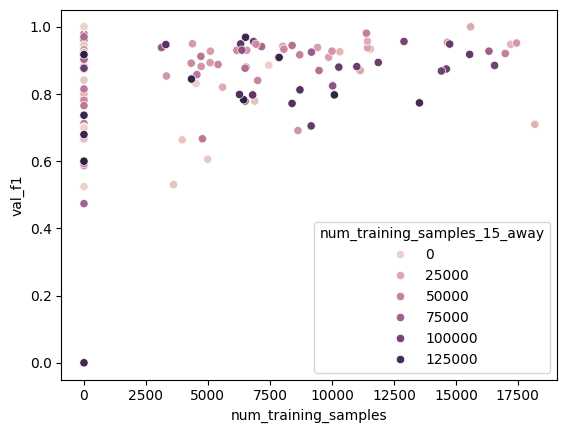

In [19]:
import seaborn as sns

sns.scatterplot(data=final_allele_df, x="num_training_samples", y="val_f1", hue="num_training_samples_15_away")#, size="num_training_samples_5_away")

<Axes: xlabel='num_training_samples', ylabel='num_validation_samples'>

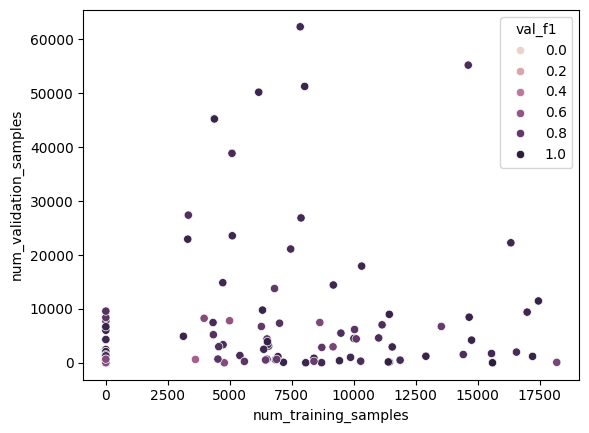

In [20]:
import seaborn as sns

sns.scatterplot(data=final_allele_df, x="num_training_samples", y="num_validation_samples", hue="val_f1")#, size="num_training_samples_5_away")

<Axes: xlabel='num_training_samples_1_away', ylabel='num_validation_samples'>

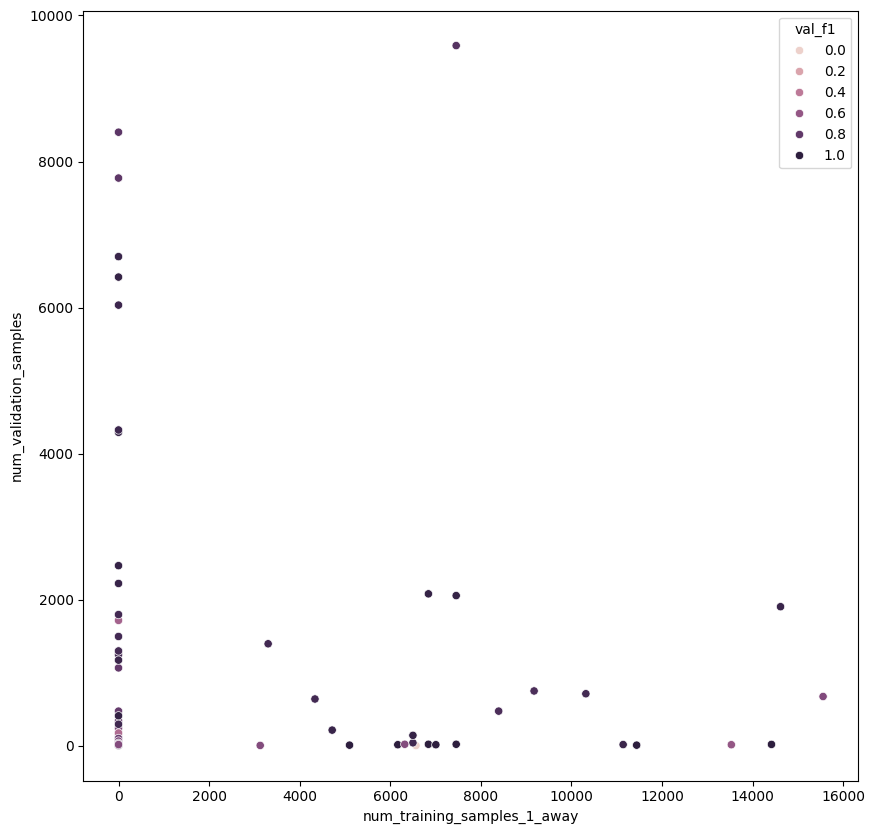

In [21]:
fig, ax = pyplot.subplots(figsize=(10, 10))


sns.scatterplot(data=absent_training, x="num_training_samples_1_away", y="num_validation_samples", hue="val_f1")#, size="num_training_samples_5_away")

<Axes: xlabel='num_training_samples_15_away', ylabel='num_validation_samples'>

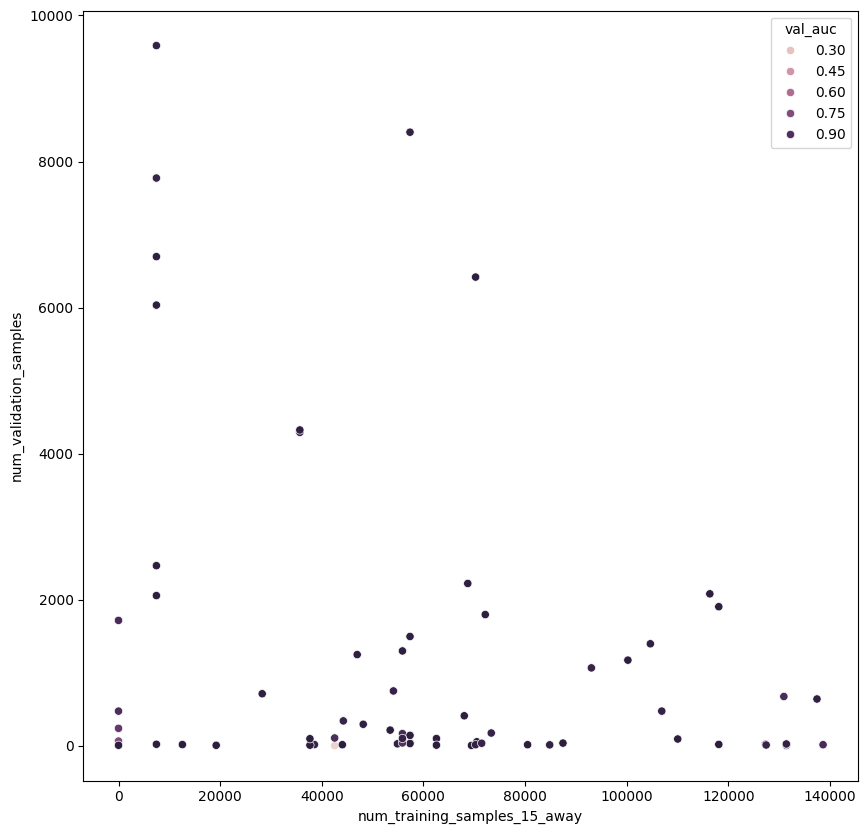

In [22]:


fig, ax = pyplot.subplots(figsize=(10, 10))

sns.scatterplot(data=absent_training, x="num_training_samples_15_away", y="num_validation_samples", hue="val_auc")#, size="num_training_samples_5_away")

<Axes: xlabel='num_training_samples_15_away', ylabel='num_validation_samples'>

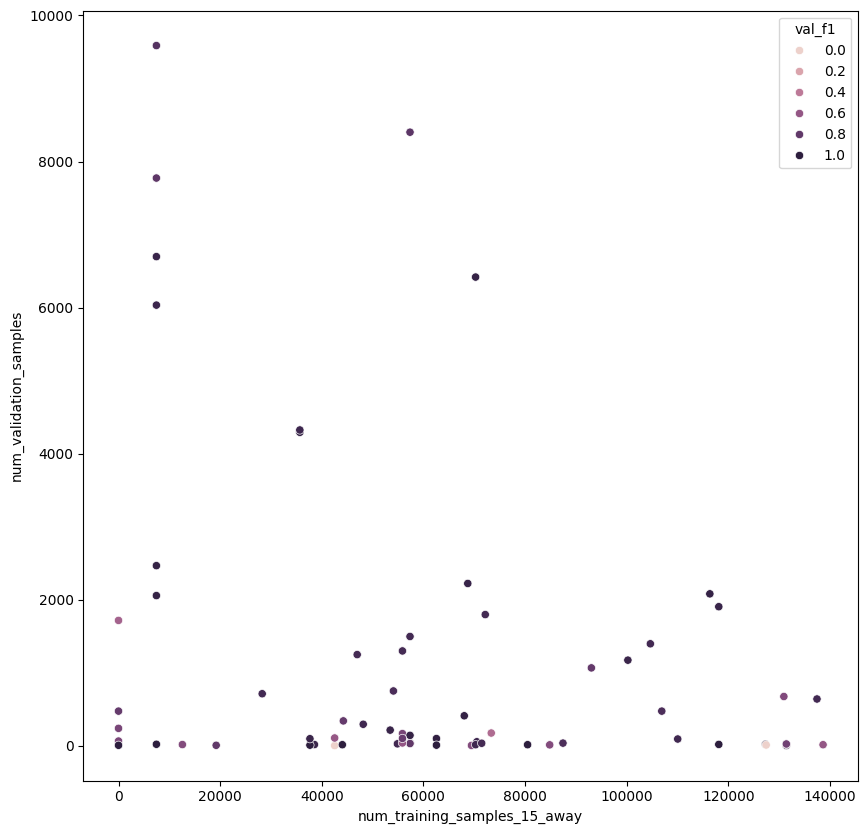

In [23]:


fig, ax = pyplot.subplots(figsize=(10, 10))

sns.scatterplot(data=absent_training, x="num_training_samples_15_away", y="num_validation_samples", hue="val_f1")#, size="num_training_samples_5_away")

In [24]:
absent_training

,allele,num_validation_samples,num_training_samples,num_hlas_15_away,num_hlas_5_away,num_hlas_3_away,num_hlas_1_away,num_analogs,names_hlas_15_away,names_hlas_5_away,...,num_training_samples_3_away,num_training_samples_1_away,num_training_samples_analogs,different_length,val_accuracy,training_accuracy,val_f1,training_f1,val_auc,training_auc
3,A2602,2,0,7,3,1,1,0,"[A3402, A2603, A6602, A2601, A6601, A3401, A2501]","[A2603, A2601, A6601]",...,6567,6567,0,False,0.500000,NaN,0.000000,NaN,0.250000,NaN
5,A2413,474,0,0,0,0,0,0,[],[],...,0,0,0,True,0.732068,NaN,0.784380,NaN,0.903389,NaN
8,A2406,712,0,3,3,2,1,0,"[A2301, A2402, A2407]","[A2301, A2402, A2407]",...,16723,10318,0,False,0.915730,NaN,0.907975,NaN,0.986749,NaN
10,A2603,106,0,7,4,2,0,0,"[A3402, A2602, A6602, A2601, A6601, A3401, A2501]","[A2602, A6602, A2601, A6601]",...,15268,0,0,False,0.707547,NaN,0.586667,NaN,0.907500,NaN
13,A0214,18,0,12,8,4,1,0,"[A0203, A0201, A0220, A0204, A0202, A0211, A68...","[A0201, A0220, A0204, A0202, A0211, A0205, A02...",...,54490,14416,0,False,1.000000,NaN,1.000000,NaN,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,C0210,640,0,19,1,1,1,0,"[C0403, C0501, C1204, C0304, C0303, C0302, C12...",[C0202],...,4337,4337,0,False,0.921875,NaN,0.917219,NaN,0.983252,NaN
145,C1604,14,0,19,4,1,1,0,"[C0501, C1204, C0304, C0102, C0303, C0210, C03...","[C1204, C1202, C1601, C1203]",...,13530,13530,0,False,0.714286,NaN,0.600000,NaN,0.917971,NaN
154,C0803,474,0,15,2,1,1,0,"[C0501, C1204, C0210, C0302, C1202, C0602, C16...","[C0801, C0802]",...,8393,8393,0,False,0.890295,NaN,0.876777,NaN,0.972259,NaN
155,C0706,16,0,4,2,1,0,0,"[C1204, C0702, C0701, C0704]","[C0702, C0701]",...,3964,0,0,False,0.750000,NaN,0.666667,NaN,1.000000,NaN


In [25]:
absent_training[['allele', 'names_hlas_1_away']]

,allele,names_hlas_1_away
3,A2602,[A2601]
5,A2413,[]
8,A2406,[A2402]
10,A2603,[]
13,A0214,[A0205]
...,...,...
139,C0210,[C0202]
145,C1604,[C1601]
154,C0803,[C0801]
155,C0706,[]


In [26]:
train_df

,Allele,Length,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic,isotonic_prob,isotonic_pred
0,A0101,8,ADMGHLKY,1,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,373,1,-2.578428,2.831741,0.974387,0.974386,1
1,A0101,9,GHQVALSSI,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,374,1,4.118745,-4.410598,0.000687,0.000687,0
2,A0101,11,KQKEVFLPSTP,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.885854,-4.178602,0.002166,0.002166,0
3,A0101,11,LLSNSSSLWRS,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.744931,-4.059163,0.002585,0.002585,0
4,A0101,11,AVQGGRLSAIT,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.169343,-3.485533,0.011797,0.011797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829154,C1701,9,VPCSYSGCE,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.146653,-4.393153,0.001750,0.001750,0
829155,C1701,9,GMKSIDTFF,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.360686,-3.640190,0.010632,0.010632,0
829156,C1701,9,HPTDPTVLI,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.563497,-3.870737,0.004285,0.004285,0
829157,C1701,9,KKKVVFCPV,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.094226,-4.352866,0.001843,0.001843,0


In [27]:
final_allele_df.loc[final_allele_df.val_f1 < 0.7][['allele', 'num_validation_samples', 'num_training_samples', 'names_hlas_3_away', 'val_f1', 'training_f1']]

,allele,num_validation_samples,num_training_samples,names_hlas_3_away,val_f1,training_f1
3,A2602,2,0,[A2601],0.000000,NaN
10,A2603,106,0,"[A2601, A6601]",0.586667,NaN
49,B5802,4,4778,[B5801],0.666667,0.935261
63,B3506,20,0,"[B3502, B3508, B3507, B3501, B3503, B3504]",0.666667,NaN
70,B3910,12,0,"[B3909, B3901, B6701, B3906, B3924, B3905]",0.666667,NaN
88,B7301,1716,0,[],0.524255,NaN
98,B5002,4,0,"[B5001, B4501]",0.666667,NaN
99,B4106,38,0,"[B4103, B4101, B4102]",0.592593,NaN
119,B4701,174,0,[],0.473684,NaN
123,B1542,10,0,[],0.000000,NaN


In [28]:
train_df.query('((Allele == "A6601") & (label == 1))')

,Allele,Length,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic,isotonic_prob,isotonic_pred
272331,A6601,9,STISEVLGR,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-2.494767,2.730335,0.961796,0.961796,1
274311,A6601,17,ESFGDLSSADAILGNPK,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,382,1,-2.783448,3.033676,0.986112,0.986112,1
274333,A6601,25,PAESYLKASDAPDLQKPDKALQSPP,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,390,1,1.170843,-1.423357,0.438897,0.438897,0
274334,A6601,24,VPPPPPPPPPPPPPPPPPPPSPPS,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,389,1,-2.394759,2.638897,0.956179,0.956179,1
274335,A6601,23,YLRYPKNRRWTEAGRFWAPHPEN,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,388,1,2.011061,-2.286182,0.110420,0.110420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278621,A6601,9,SIIGKGGQR,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-2.358844,2.588971,0.946376,0.946376,1
278622,A6601,9,QVVKPTAER,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-2.585536,2.828379,0.970791,0.970790,1
278623,A6601,9,QLSELTVER,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,1.521185,-1.777276,0.273285,0.273285,0
278624,A6601,9,QVLQAMRQR,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-1.450830,1.639663,0.705133,0.705133,1


In [29]:
train_df.query('((Allele == "A2601") & (label == 1))')

,Allele,Length,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic,isotonic_prob,isotonic_pred
180406,A2601,11,ETVDPASLWEY,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,376,1,-3.162959,3.422349,0.997295,0.997295,1
180407,A2601,10,EVIDHKLTER,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,375,1,-3.231306,3.490490,0.998164,0.998164,1
182043,A2601,9,EVLGILRYI,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-1.612570,1.811048,0.760276,0.760276,1
182587,A2601,9,ETVGKFIQY,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-3.245527,3.509762,0.998601,0.998601,1
182594,A2601,7,AEHVQYM,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,372,1,-1.434730,1.674459,0.752862,0.752862,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183654,A2601,9,EVLKAVTAL,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-2.743980,2.976230,0.982964,0.982964,1
183655,A2601,9,EVLNFLLRY,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-2.657808,2.908679,0.980572,0.980572,1
183656,A2601,9,EVMEIMSRF,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-3.263491,3.524396,0.998601,0.998601,1
183657,A2601,9,EVNGLISMY,1,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,MAVMAPRTLVLLLSGALALTQTWAGSHSMRYFYTSVSRPGRGEPRF...,374,1,-3.112252,3.372236,0.996443,0.996443,1


In [30]:
A2603 = val_df.loc[val_df.MHC_expanded == 'A2603', 'hla_sequence'].tolist()[0]
A2601 = val_df.loc[val_df.MHC_expanded == 'A2601', 'hla_sequence'].tolist()[0]
A6601 = val_df.loc[val_df.MHC_expanded == 'A6601', 'hla_sequence'].tolist()[0]

In [31]:
for ia, a in enumerate(A2603):
    if a != A2601[ia]: 
        print(ia)

97
99
100


In [32]:
for ia, a in enumerate(A2603):
    if a != A6601[ia]: 
        print(ia)

93
97


In [34]:
val_df.query(

,epitope,label,MHC_expanded,peptide_length,key_binder,hla_sequence,predict_on,logit_1,logit_2,final_predictions,Length,predict_on_len,isotonic_prob,isotonic_pred
0,LSTVGPRL,1,C0304,8.0,537649.0,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,MRVMAPRTLILLLSGALALTETWAGSHSMRYFYTAVSRPGRGEPHF...,-1.635385,1.839033,0.862834,NaN,NaN,0.767125,1
1,AETTTLFQF,1,B4403,9.0,317702.0,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFYTAMSRPGRGEPRF...,-3.080864,3.342883,0.965871,NaN,NaN,0.995639,1
2,LPMKVRALGL,1,B0702,10.0,518233.0,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,-2.684186,2.932315,0.949421,NaN,NaN,0.981215,1
3,DIQSSGRAK,1,A0301,9.0,12400.0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,3.406410,-3.716567,0.023740,NaN,NaN,0.006106,0
4,TMGHHTVGLK,1,A0301,10.0,308039.0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,1.666246,-1.937590,0.125913,NaN,NaN,0.197259,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787639,YILPILGICNE,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,2.986101,-3.262673,0.036874,11.0,383.0,0.019663,0
787640,SAPEEGEVSDS,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,3.538209,-3.794415,0.022001,11.0,383.0,0.007954,0
787641,GLAIVTKYITK,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,2.715949,-2.995777,0.047617,11.0,383.0,0.037881,0
787642,SKKVDFELAVQ,0,C1701,NaN,NaN,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,3.267602,-3.562536,0.027584,11.0,383.0,0.011199,0


In [35]:
train_df

,Allele,Length,Peptide,label,allele_sequence,predict_on,predict_on_len,training,logit_1,logit_2,isotonic,isotonic_prob,isotonic_pred
0,A0101,8,ADMGHLKY,1,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,373,1,-2.578428,2.831741,0.974387,0.974386,1
1,A0101,9,GHQVALSSI,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,374,1,4.118745,-4.410598,0.000687,0.000687,0
2,A0101,11,KQKEVFLPSTP,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.885854,-4.178602,0.002166,0.002166,0
3,A0101,11,LLSNSSSLWRS,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.744931,-4.059163,0.002585,0.002585,0
4,A0101,11,AVQGGRLSAIT,0,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,MAVMAPRTLLLLLSGALALTQTWAGSHSMRYFFTSVSRPGRGEPRF...,376,1,3.169343,-3.485533,0.011797,0.011797,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829154,C1701,9,VPCSYSGCE,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.146653,-4.393153,0.001750,0.001750,0
829155,C1701,9,GMKSIDTFF,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.360686,-3.640190,0.010632,0.010632,0
829156,C1701,9,HPTDPTVLI,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,3.563497,-3.870737,0.004285,0.004285,0
829157,C1701,9,KKKVVFCPV,0,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,MRVMAPQALLLLLSGALALIETWAGSHSMRYFYTAVSRPGRGEPRF...,381,1,4.094226,-4.352866,0.001843,0.001843,0


In [41]:
solo_df = val_df.loc[~(val_df.MHC_expanded.isin(train_df['Allele'].drop_duplicates().tolist()))].copy()
solo_df

,epitope,label,MHC_expanded,peptide_length,key_binder,hla_sequence,predict_on,logit_1,logit_2,final_predictions,Length,predict_on_len,isotonic_prob,isotonic_pred
5,VEKAPQETY,1,B1511,9.0,55738.0,MRVTAPRTVLLLLSGALALTETWAGSHSMRYFYTAMSRPGRGEPRF...,MRVTAPRTVLLLLSGALALTETWAGSHSMRYFYTAMSRPGRGEPRF...,1.397099,-1.654740,0.160469,NaN,NaN,0.316222,0
9,LPDEIYHVY,1,B1511,9.0,256434.0,MRVTAPRTVLLLLSGALALTETWAGSHSMRYFYTAMSRPGRGEPRF...,MRVTAPRTVLLLLSGALALTETWAGSHSMRYFYTAMSRPGRGEPRF...,-1.552696,1.738904,0.850548,NaN,NaN,0.726732,1
14,QPLQESTSATL,1,B6701,11.0,211617.0,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,1.278225,-1.547386,0.175464,NaN,NaN,0.353764,0
15,AHCGAGDEL,1,B3901,9.0,354555.0,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,MLVMAPRTVLLLLSAALALTETWAGSHSMRYFYTSVSRPGRGEPRF...,-2.455605,2.712080,0.937736,NaN,NaN,0.965202,1
24,GRLQQVLTGL,1,B2707,10.0,79680.0,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFHTSVSRPGRGEPRF...,MRVTAPRTLLLLLWGAVALTETWAGSHSMRYFHTSVSRPGRGEPRF...,-2.852410,3.105193,0.957106,NaN,NaN,0.989326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787292,YREMLHNAT,0,C1604,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,4.394435,-4.651414,0.009458,9.0,375.0,0.000068,0
787293,VIPKKKTWD,0,C1604,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,3.958503,-4.268003,0.013816,9.0,375.0,0.001420,0
787294,LFMFTRRVNE,0,C1604,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,4.347547,-4.611484,0.009839,10.0,376.0,0.000167,0
787295,GYIVSTSCKHI,0,C1604,NaN,NaN,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,MRVMAPRTLILLLSGALALTETWACSHSMRYFYTAVSRPGRGEPRF...,3.164499,-3.513767,0.028923,11.0,377.0,0.007411,0


In [44]:
sum(solo_df.isotonic_pred == solo_df.label)/len(solo_df)

0.9008903809662823

In [45]:
sum(val_df.isotonic_pred == val_df.label)/len(val_df)

0.90649328884623